# Project for Introduction to Analytics            .........         Taimoor Khawaja

In [1]:
#importing Libraries
import numpy as np #library for mathematical calculation
import matplotlib.pyplot as plt#library for plotting
import pandas as pd #library for importing dataset
import yfinance as yf#library for getting data from yahoo finance
import datetime as dt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
from sklearn import preprocessing

In [2]:
data = yf.download("MU", start="2014-01-01", end="2019-01-01")
data.to_csv("project_data.csv")
df=pd.read_csv("project_data.csv")
# df=pd.read_csv("project_data.csv",index_col="Date",parse_dates=True)
df.drop(axis=1,columns=["Open","High","Low","Adj Close","Volume"],inplace=True)
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Close
0,2013-12-31,21.75
1,2014-01-02,21.66
2,2014-01-03,20.97
3,2014-01-06,20.67
4,2014-01-07,21.73


In [3]:
df['Label']= df['Close'].shift(-1)


In [4]:
#preperation for momentum feature and adding to the dataset
df["four_shift"]=df["Close"].shift(4)
df["momentum"]=(df["Close"]-df["four_shift"])
df.head()

,Date,Close,Label,four_shift,momentum
0,2013-12-31,21.75,21.66,NaN,NaN
1,2014-01-02,21.66,20.97,NaN,NaN
2,2014-01-03,20.97,20.67,NaN,NaN
3,2014-01-06,20.67,21.73,NaN,NaN
4,2014-01-07,21.73,23.87,21.75,-0.02


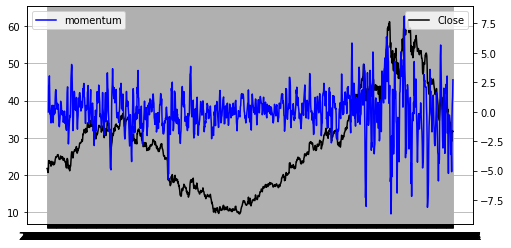

In [5]:
#Visualizing price and features in the same graph

fig, ax = plt.subplots(figsize=(8,4))
 
plt.plot(df['Date'], df['Close'], label='Close', color='black')
plt.legend(loc='upper right')
plt.grid()
 

# Get second axis
ax2 = ax.twinx()
 
plt.plot(df['Date'],  df['momentum'], label='momentum',color='blue')
plt.legend(loc='upper left')
plt.show()

In [6]:
#preperation for "Disperity in 5 days" feature and adding to the dataset
df["MA5"]=df['Close'].rolling(5).mean()
df["Disparity_in_5_days"]=(df["Close"]/df["MA5"])*100

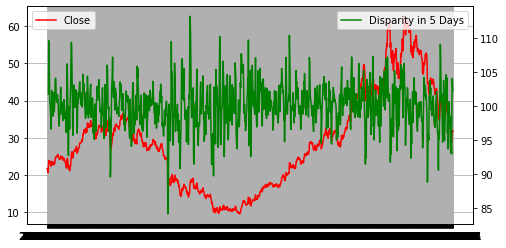

In [7]:
#Visualizing price and features in the same graph 
#%matplotlib notebook

fig, axis = plt.subplots(figsize=(8, 4))
 
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.legend(loc=0)
plt.grid()
 

# Get second axis
ax2 = axis.twinx()
 
plt.plot(df['Date'],  df['Disparity_in_5_days'], label='Disparity in 5 Days',color='green')
plt.legend(loc=0)
plt.show()

In [8]:
df["Close_log"]=np.log(df['Close'])

In [9]:
df["Close_shift"]=df["Close"].shift(-1)
df["log_closing_shift"]=np.log(df["Close_shift"])
df["SY_t"]=df["Close_log"]-df["log_closing_shift"]
df["ASY_2"] = df["SY_t"].rolling(2).mean()
df["ASY_4"] = df["SY_t"].rolling(4).mean()



In [10]:
df

,Date,Close,Label,four_shift,momentum,MA5,Disparity_in_5_days,Close_log,Close_shift,log_closing_shift,SY_t,ASY_2,ASY_4
0,2013-12-31,21.75,21.66,NaN,NaN,NaN,NaN,3.079614,21.66,3.075467,0.004147,NaN,NaN
1,2014-01-02,21.66,20.97,NaN,NaN,NaN,NaN,3.075467,20.97,3.043093,0.032374,0.018260,NaN
2,2014-01-03,20.97,20.67,NaN,NaN,NaN,NaN,3.043093,20.67,3.028683,0.014409,0.023392,NaN
3,2014-01-06,20.67,21.73,NaN,NaN,NaN,NaN,3.028683,21.73,3.078694,-0.050010,-0.017800,0.000230
4,2014-01-07,21.73,23.87,21.75,-0.02,21.356,101.751264,3.078694,23.87,3.172622,-0.093929,-0.071970,-0.024289
5,2014-01-08,23.87,23.24,21.66,2.21,21.780,109.595960,3.172622,23.24,3.145875,0.026748,-0.033591,-0.025696
6,2014-01-09,23.24,23.71,20.97,2.27,22.096,105.177408,3.145875,23.71,3.165897,-0.020022,0.003363,-0.034303
7,2014-01-10,23.71,23.33,20.67,3.04,22.644,104.707649,3.165897,23.33,3.149740,0.016157,-0.001933,-0.017762
8,2014-01-13,23.33,23.67,21.73,1.60,23.176,100.664480,3.149740,23.67,3.164208,-0.014468,0.000844,0.002104
9,2014-01-14,23.67,23.33,23.87,-0.20,23.564,100.449839,3.164208,23.33,3.149740,0.014468,0.000000,-0.000966


In [11]:
df.dropna(inplace=True)
df.tail()

,Date,Close,Label,four_shift,momentum,MA5,Disparity_in_5_days,Close_log,Close_shift,log_closing_shift,SY_t,ASY_2,ASY_4
1253,2018-12-21,30.32,29.02,33.88,-3.56,32.200,94.161491,3.411808,29.02,3.367985,0.043822,0.037497,0.040401
1254,2018-12-24,29.02,30.89,34.11,-5.09,31.228,92.929422,3.367985,30.89,3.430433,-0.062447,-0.009312,0.004173
1255,2018-12-26,30.89,31.93,31.41,-0.52,30.584,101.000523,3.430433,31.93,3.463546,-0.033113,-0.047780,-0.005142
1256,2018-12-27,31.93,31.57,31.28,0.65,30.688,104.047185,3.463546,31.57,3.452207,0.011339,-0.010887,-0.010100
1257,2018-12-28,31.57,31.73,30.32,1.25,30.746,102.680023,3.452207,31.73,3.457263,-0.005055,0.003142,-0.022319


In [12]:
# Forcast with close and label
table_1=pd.DataFrame()
table_1=df[['Close','Label']]

In [13]:

X1=table_1.iloc[:,0].values
X1=X1.reshape(-1,1)

y1=table_1.iloc[:,1].values
y1=y1.reshape(-1,1)



In [14]:
#STANDARD SCALING
from sklearn import preprocessing
#y_model1=y_model1.reshape(-1,1)
Scaler = preprocessing.StandardScaler().fit(y1)
X1= Scaler.transform(X1)
y1=Scaler.transform(y1)

In [15]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X1):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train1, y_test1= y1[train_index], y1[test_index]

In [16]:
#Regression on training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train1,y_train1)
regressor.score(X_test1,y_test1)


0.9682726634249106

In [17]:
#predicting the Test set results
y_pred1=regressor.predict(X_test1)

In [18]:
#restranform the scaled data to original data
Org1=np.array(Scaler.inverse_transform(y_pred1)).reshape(1,-1)[0]
test1=pd.Series(Org1)
Org2=np.array(Scaler.inverse_transform(y_test1)).reshape(1,-1)[0]
test2=pd.Series(Org2)
test_df=pd.DataFrame()
test_df=pd.concat([test2,test1], axis=1)
test_df.columns=['Expected Output','Prediction']
test_df.head()

,Expected Output,Prediction
0,52.03,49.143432
1,53.74,52.064316
2,53.97,53.774834
3,55.22,54.004903
4,54.59,55.255281


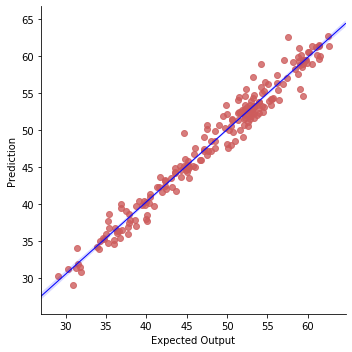

In [19]:

#Visualizing test_df data
%matplotlib inline

sns.lmplot("Expected Output","Prediction",test_df,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={"linewidth":1,"color":'blue'})

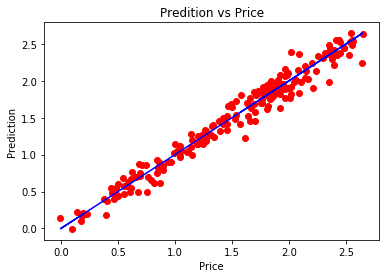

In [20]:
# Visualising the Test set results
plt.scatter(X_test1, y_test1, color = 'red')
plt.plot(X_test1, regressor.predict(X_test1), color = 'blue')
plt.title('Predition vs Price')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.show()

In [21]:
#Mean Absolutate Percentage Error
from sklearn.metrics import mean_absolute_error
MASE=mean_absolute_error(y_test1, y_pred1) * 100
MASE

8.781062227743892

In [22]:
MAPE = (abs(y_test1 - y_pred1)/abs(y_test1)).sum()/len(y_test1)*100
MAPE

17.320736449108693

In [23]:
# Calculating sMAPE
#source:https://stackoverflow.com/questions/51444630/how-to-use-smape-evaluation-metric-on-train-dataset

sMAPE=100/len(y_test1) * np.sum(2 * np.abs(y_pred1 - y_test1) / (np.abs(y_test1) + np.abs(y_pred1)))
sMAPE

9.242520060748985

In [24]:
# Forcast with Closing Price ,Momentum ,Dispertiy in 5 Days
Table_2=pd.DataFrame()
Table_2=df[['Close','momentum','Disparity_in_5_days','Label']]


In [25]:
X=Table_2.iloc[:,0:3].values
y=Table_2.iloc[:,3].values

In [26]:
# X

In [27]:
#STANDARD SCALING
from sklearn import preprocessing
y=y.reshape(-1,1)
Scaler = preprocessing.StandardScaler().fit(y)
X= Scaler.transform(X)
y=Scaler.transform(y)

In [28]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test= y[train_index], y[test_index]

In [29]:
#Regression on training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9682511154756697

In [30]:
y_pred=regressor.predict(X_test)

In [31]:
#Mean Absolutate Percentage Error
from sklearn.metrics import mean_absolute_error
MASE=mean_absolute_error(y_test, y_pred) * 100
MASE

8.779816868751643

In [32]:
# Calculating MAPE
MAPE = (abs(y_test - y_pred)/abs(y_test)).sum()/len(X_test)*100
MAPE

17.24152020952087

In [33]:
# Calculating sMAPE
#source:https://stackoverflow.com/questions/51444630/how-to-use-smape-evaluation-metric-on-train-dataset

sMAPE=100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
sMAPE

9.236018934421907

In [34]:
#Table 3
Table_3=pd.DataFrame()
Table_3=df[['Close','momentum','Disparity_in_5_days','ASY_2','ASY_4','Label']]

In [35]:
X=Table_3.iloc[:,0:5].values
#X=X.reshape(-1,1)

y=Table_3.iloc[:,5].values
y=y.reshape(-1,1)

In [36]:
# X

In [37]:
#STANDARD SCALING
from sklearn import preprocessing
y=y.reshape(-1,1)
Scaler = preprocessing.StandardScaler().fit(y)
X= Scaler.transform(X)
y=Scaler.transform(y)

In [38]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test= y[train_index], y[test_index]

In [39]:
#Regression on training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9893154723442322

In [40]:
y_pred=regressor.predict(X_test)

In [41]:
#Mean Absolutate Percentage Error
from sklearn.metrics import mean_absolute_error
MASE=mean_absolute_error(y_test, y_pred) * 100
MASE

5.062874154300116

In [42]:
#calculating MAPE
MAPE = (abs(y_test - y_pred)/abs(y_test)).sum()/len(X_test)*100
MAPE

4.361482375227456

In [43]:
# Calculating sMAPE
#source:https://stackoverflow.com/questions/51444630/how-to-use-smape-evaluation-metric-on-train-dataset

sMAPE=100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
sMAPE

4.2590206736952565

# Step 5

In [44]:
test_df['Signal']=(test_df['Prediction']-test_df['Expected Output']).dropna()
test_df['Signal']=np.sign(test_df['Signal']).dropna()
test_df.head()

,Expected Output,Prediction,Signal
0,52.03,49.143432,-1.0
1,53.74,52.064316,-1.0
2,53.97,53.774834,-1.0
3,55.22,54.004903,-1.0
4,54.59,55.255281,1.0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
inp =np.array(test_df['Expected Output'])
inp=inp.reshape(-1,1)
lab=np.array(test_df['Signal'])



In [46]:
X_train, X_test, y_train, y_test = train_test_split(inp, lab, test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors = 25)
knn = knn.fit(X_train, y_train)
predict = knn.predict(X_test)
hit_rate=sum(predict==y_test)/len(predict)
hit_rate

0.5476190476190477

In [47]:
# Short term and long term averages setting
short_window = 40
long_window = 100
df["signal"]=0.0
df["short"] = df["Close"].rolling(window = short_window, min_periods=1, center=False).mean()
df["long"] = df["Close"].rolling(window = long_window, min_periods=1, center=False).mean()
df["signal"][short_window:]=np.where(df["short"][short_window:]>df["long"][short_window:],1.0,0.0)
df["positions"] = df["signal"].diff()
print(df)

            Date  Close  Label  four_shift  momentum     MA5  \
4     2014-01-07  21.73  23.87       21.75     -0.02  21.356   
5     2014-01-08  23.87  23.24       21.66      2.21  21.780   
6     2014-01-09  23.24  23.71       20.97      2.27  22.096   
7     2014-01-10  23.71  23.33       20.67      3.04  22.644   
8     2014-01-13  23.33  23.67       21.73      1.60  23.176   
9     2014-01-14  23.67  23.33       23.87     -0.20  23.564   
10    2014-01-15  23.33  23.13       23.24      0.09  23.456   
11    2014-01-16  23.13  22.38       23.71     -0.58  23.434   
12    2014-01-17  22.38  23.12       23.33     -0.95  23.168   
13    2014-01-21  23.12  23.65       23.67     -0.55  23.126   
14    2014-01-22  23.65  23.64       23.33      0.32  23.122   
15    2014-01-23  23.64  22.92       23.13      0.51  23.184   
16    2014-01-24  22.92  22.90       22.38      0.54  23.142   
17    2014-01-27  22.90  23.05       23.12     -0.22  23.246   
18    2014-01-28  23.05  22.71       23.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



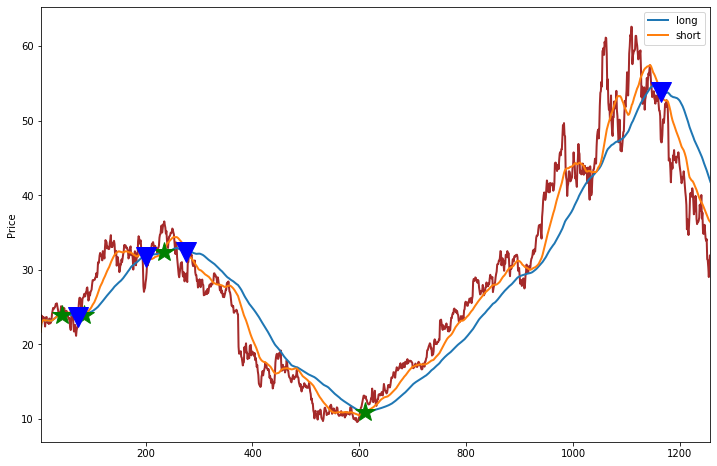

In [48]:
figure = plt.figure(figsize=(12,8))
# subplot and labels
ax1 = figure.add_subplot(111, ylabel='Price')
# plot prices
df['Close'].plot(ax=ax1, color='brown', lw=2.)
# plot the moving averages
df[["long","short"]].plot(ax=ax1, lw=2.)
# plot the buy signals
ax1.plot(df.loc[df.positions == 1.0].index, df.short[df.positions == 1.0], '*', markersize=20, color='green')
# plot the sell signals
ax1.plot(df.loc[df.positions == -1.0].index, df.long[df.positions == -1.0], 'v', markersize=20, color='b')
plt.show()  

In [49]:
#As we are adding more features our prediction is getting better and regression results are improving.And also the 
#values or MASE,MAPE and sMAPE are reducing.